In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('house_data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [4]:
df2 = df.drop(['availability'], axis = 1)
df2.head()

,area_type,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df2.isnull().sum()

area_type        0
location         1
size            16
society       5502
total_sqft       0
bath            73
balcony        609
price            0
dtype: int64

In [6]:
df3 = df2.dropna()
df3.shape

(7496, 8)

In [7]:
df3.head()

,area_type,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
5,Super built-up Area,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
11,Plot Area,Whitefield,4 Bedroom,Prrry M,2785,5.0,3.0,295.00


In [8]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 RK', '4 BHK',
       '1 BHK', '5 BHK', '11 BHK', '5 Bedroom', '9 BHK', '2 Bedroom',
       '6 BHK', '7 BHK', '6 Bedroom'], dtype=object)

In [9]:
df3['bhk'] = df3['size'].apply(lambda x : int(x.split(" ")[0]))
df3.head()

/var/folders/ws/yv9j568n2jb6_6brg48628qm0000gn/T/ipykernel_1133/3162023914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x : int(x.split(" ")[0]))


,area_type,location,size,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4
3,Super built-up Area,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3
5,Super built-up Area,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00,2
11,Plot Area,Whitefield,4 Bedroom,Prrry M,2785,5.0,3.0,295.00,4


In [10]:
df3['bhk'].unique()

array([ 2,  4,  3,  1,  5, 11,  9,  6,  7])

In [11]:
df3['total_sqft'].unique()

array(['1056', '2600', '1521', ..., '1919', '2111', '4689'], dtype=object)

In [12]:
df3['total_sqft'].unique()

array(['1056', '2600', '1521', ..., '1919', '2111', '4689'], dtype=object)

In [13]:
df3.balcony.unique()

array([1., 3., 2., 0.])

In [14]:
df3.loc[3]

area_type     Super built-up  Area
location        Lingadheeranahalli
size                         3 BHK
society                    Soiewre
total_sqft                    1521
bath                           3.0
balcony                        1.0
price                         95.0
bhk                              3
Name: 3, dtype: object

In [15]:
df3['price'].dtype

dtype('float64')

In [16]:
df3['total_sqft'].isnull().sum()

0

In [17]:
def to_float(num):
    try:
        return float(num)
    except:
        return None

In [18]:
df3['total_sqft'] = df3['total_sqft'].apply(to_float)
df3.head()

/var/folders/ws/yv9j568n2jb6_6brg48628qm0000gn/T/ipykernel_1133/3244814993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['total_sqft'] = df3['total_sqft'].apply(to_float)


,area_type,location,size,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4
3,Super built-up Area,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3
5,Super built-up Area,Whitefield,2 BHK,DuenaTa,1170.0,2.0,1.0,38.00,2
11,Plot Area,Whitefield,4 Bedroom,Prrry M,2785.0,5.0,3.0,295.00,4


In [19]:
df3['price_per_sqft'] = df3['price']*100000/df3['total_sqft']
df3.head()

/var/folders/ws/yv9j568n2jb6_6brg48628qm0000gn/T/ipykernel_1133/2120074316.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['price_per_sqft'] = df3['price']*100000/df3['total_sqft']


,area_type,location,size,society,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4,4615.384615
3,Super built-up Area,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3,6245.890861
5,Super built-up Area,Whitefield,2 BHK,DuenaTa,1170.0,2.0,1.0,38.00,2,3247.863248
11,Plot Area,Whitefield,4 Bedroom,Prrry M,2785.0,5.0,3.0,295.00,4,10592.459605


In [20]:
df3.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [21]:
len(df3.location.unique())

634

In [22]:
location_stats = df3.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield                        397
Sarjapur  Road                    310
Electronic City                   236
Kanakpura Road                    216
Thanisandra                       212
                                 ... 
Kalhalli                            1
 Bhoganhalli                        1
KSRTC Layout                        1
KR Garden                           1
Yeshwanthpur Industrial Suburb      1
Name: location, Length: 634, dtype: int64

In [23]:
len(location_stats[location_stats<10])

480

In [24]:
location_less_than_10 = location_stats[location_stats<10]
location_less_than_10

location
Kodigehaali                       9
Sompura                           9
Nehru Nagar                       9
Narayanapura                      9
Murugeshpalya                     9
                                 ..
Kalhalli                          1
 Bhoganhalli                      1
KSRTC Layout                      1
KR Garden                         1
Yeshwanthpur Industrial Suburb    1
Name: location, Length: 480, dtype: int64

In [25]:
df3.location = df3.location.apply(lambda x: 'other' if x in location_less_than_10 else x)
df3.head()

/var/folders/ws/yv9j568n2jb6_6brg48628qm0000gn/T/ipykernel_1133/782126729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.location = df3.location.apply(lambda x: 'other' if x in location_less_than_10 else x)


,area_type,location,size,society,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4,4615.384615
3,Super built-up Area,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3,6245.890861
5,Super built-up Area,Whitefield,2 BHK,DuenaTa,1170.0,2.0,1.0,38.00,2,3247.863248
11,Plot Area,Whitefield,4 Bedroom,Prrry M,2785.0,5.0,3.0,295.00,4,10592.459605


In [26]:
len(df3.location.unique())

155

In [27]:
df3.head(10)

,area_type,location,size,society,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4,4615.384615
3,Super built-up Area,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3,6245.890861
5,Super built-up Area,Whitefield,2 BHK,DuenaTa,1170.0,2.0,1.0,38.00,2,3247.863248
11,Plot Area,Whitefield,4 Bedroom,Prrry M,2785.0,5.0,3.0,295.00,4,10592.459605
12,Super built-up Area,7th Phase JP Nagar,2 BHK,Shncyes,1000.0,2.0,1.0,38.00,2,3800.000000
14,Plot Area,Sarjapur,3 Bedroom,Skityer,2250.0,3.0,2.0,148.00,3,6577.777778
15,Super built-up Area,Mysore Road,2 BHK,PrntaEn,1175.0,2.0,2.0,73.50,2,6255.319149
16,Super built-up Area,Bisuvanahalli,3 BHK,Prityel,1180.0,3.0,2.0,48.00,3,4067.796610
17,Super built-up Area,Raja Rajeshwari Nagar,3 BHK,GrrvaGr,1540.0,3.0,3.0,60.00,3,3896.103896


In [28]:
x = df3.groupby('location')['location'].agg('count')
x

location
1st Phase JP Nagar      14
5th Phase JP Nagar      17
7th Phase JP Nagar      98
8th Phase JP Nagar      27
9th Phase JP Nagar      21
                      ... 
Whitefield             397
Yelahanka              160
Yelahanka New Town      22
Yeshwanthpur            63
other                 1342
Name: location, Length: 155, dtype: int64

In [29]:
# find outliers

df3[(df3.total_sqft/df3.bhk < 300)].head()

,area_type,location,size,society,total_sqft,bath,balcony,price,bhk,price_per_sqft
349,Plot Area,other,3 Bedroom,PrhyaK,11.0,3.0,2.0,74.0,3,672727.272727
480,Built-up Area,other,4 BHK,LiaveEn,1150.0,4.0,2.0,260.0,4,22608.695652
483,Plot Area,other,5 Bedroom,Bemesrm,1200.0,5.0,2.0,190.0,5,15833.333333
1239,Built-up Area,Electronic City,2 BHK,Itelaa,550.0,1.0,1.0,16.0,2,2909.090909
2040,Super built-up Area,Electronic City,2 BHK,Itelaa,550.0,1.0,1.0,15.0,2,2727.272727


In [30]:
df3.shape

(7496, 10)

In [31]:
df4 = df3[~(df3.total_sqft/df3.bhk < 300)]
df4.head()

,area_type,location,size,society,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4,4615.384615
3,Super built-up Area,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3,6245.890861
5,Super built-up Area,Whitefield,2 BHK,DuenaTa,1170.0,2.0,1.0,38.00,2,3247.863248
11,Plot Area,Whitefield,4 Bedroom,Prrry M,2785.0,5.0,3.0,295.00,4,10592.459605


In [32]:
df4.shape

(7454, 10)

In [33]:
df4.price_per_sqft.describe()

count     7295.000000
mean      5867.138052
std       2721.981370
min        371.428571
25%       4281.334216
50%       5339.554173
75%       6711.409396
max      76530.612245
Name: price_per_sqft, dtype: float64

In [34]:
df4.price_per_sqft.mean() + df4.price_per_sqft.std()

8589.11942216029

In [35]:
def remove_price_per_sqft_outliers(df):
    df_out = pd.DataFrame()
    for name, group in df.groupby('location'):
        mean_x = np.mean(group.price_per_sqft)
        std_x = np.std(group.price_per_sqft)
        reduced_df = group[(group.price_per_sqft > mean_x - std_x) & (group.price_per_sqft <= mean_x + std_x)]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out

df5 = remove_price_per_sqft_outliers(df4)
df5.shape

(5738, 10)

In [36]:
df5.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area           895
Carpet  Area              29
Plot  Area               108
Super built-up  Area    4706
Name: area_type, dtype: int64

In [37]:
df5['area_type'] = df5['area_type'].apply(lambda x: x.strip())
df5.head()

,area_type,location,size,society,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,1st Phase JP Nagar,4 BHK,Prhtsok,2825.0,4.0,3.0,250.0,4,8849.557522
1,Super built-up Area,1st Phase JP Nagar,3 BHK,Prhtsok,1875.0,3.0,1.0,167.0,3,8906.666667
2,Super built-up Area,1st Phase JP Nagar,2 BHK,NCaveun,1394.0,2.0,1.0,100.0,2,7173.601148
3,Super built-up Area,1st Phase JP Nagar,2 BHK,Inntsth,1077.0,2.0,2.0,93.0,2,8635.097493
4,Super built-up Area,1st Phase JP Nagar,3 BHK,Inntsth,1590.0,3.0,3.0,131.0,3,8238.993711


In [38]:
df5.groupby('location')['location'].agg('count')

location
1st Phase JP Nagar       9
5th Phase JP Nagar      10
7th Phase JP Nagar      67
8th Phase JP Nagar      23
9th Phase JP Nagar      15
                      ... 
Whitefield             345
Yelahanka              137
Yelahanka New Town      17
Yeshwanthpur            49
other                 1166
Name: location, Length: 155, dtype: int64

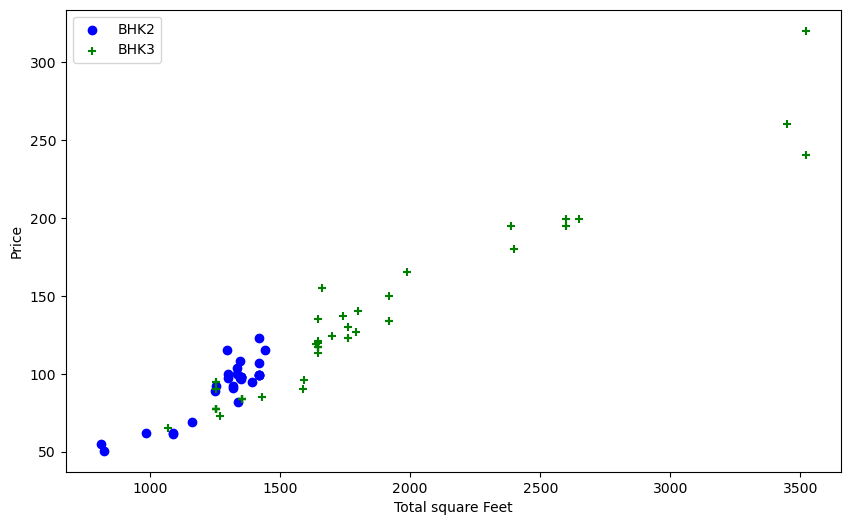

In [39]:
def scatter_plot(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    plt.figure(figsize=(10, 6))
    plt.scatter(bhk2.total_sqft,bhk2.price, label = "BHK2", c = "blue")
    plt.scatter(bhk3.total_sqft,bhk3.price,  label = "BHK3", c = "green", marker = '+')
    plt.xlabel("Total square Feet")
    plt.ylabel("Price")
    plt.legend()
    plt.show()

scatter_plot(df5, 'Hebbal')

In [40]:
df5.shape

(5738, 10)

In [41]:
def remove_bhk_outliers(df):
    remove_index = np.array([])
    for location, group_loca in df.groupby('location'):
        bhk_stats = {}
        for bhk, group_bhk in group_loca.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(group_bhk.price_per_sqft),
                'std' : np.std(group_bhk.price_per_sqft),
                'count': group_bhk.shape[0]
            }
        for bhk, group_bhk in group_loca.groupby('bhk'):
            prev = bhk_stats.get(bhk - 1)
            if prev and prev['count'] > 5:
                remove_index = np.append(remove_index, group_bhk[prev['mean'] > group_bhk['price_per_sqft']].index.values)
    return df.drop(remove_index, axis = 'index')

df6 = remove_bhk_outliers(df5)
df6.shape
df6.head(10)

,area_type,location,size,society,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,1st Phase JP Nagar,4 BHK,Prhtsok,2825.0,4.0,3.0,250.0,4,8849.557522
1,Super built-up Area,1st Phase JP Nagar,3 BHK,Prhtsok,1875.0,3.0,1.0,167.0,3,8906.666667
2,Super built-up Area,1st Phase JP Nagar,2 BHK,NCaveun,1394.0,2.0,1.0,100.0,2,7173.601148
3,Super built-up Area,1st Phase JP Nagar,2 BHK,Inntsth,1077.0,2.0,2.0,93.0,2,8635.097493
4,Super built-up Area,1st Phase JP Nagar,3 BHK,Inntsth,1590.0,3.0,3.0,131.0,3,8238.993711
5,Super built-up Area,1st Phase JP Nagar,3 BHK,Prhtsok,2180.0,3.0,2.0,210.0,3,9633.027523
6,Super built-up Area,1st Phase JP Nagar,3 BHK,Inntsth,2077.0,3.0,3.0,175.0,3,8425.613866
7,Super built-up Area,1st Phase JP Nagar,2 BHK,NCaveun,1205.0,2.0,1.0,85.0,2,7053.941909
8,Super built-up Area,1st Phase JP Nagar,4 BHK,Prhtsok,2615.0,5.0,3.0,222.0,4,8489.483748
9,Built-up Area,5th Phase JP Nagar,2 BHK,Prenty,1150.0,3.0,3.0,52.5,2,4565.217391


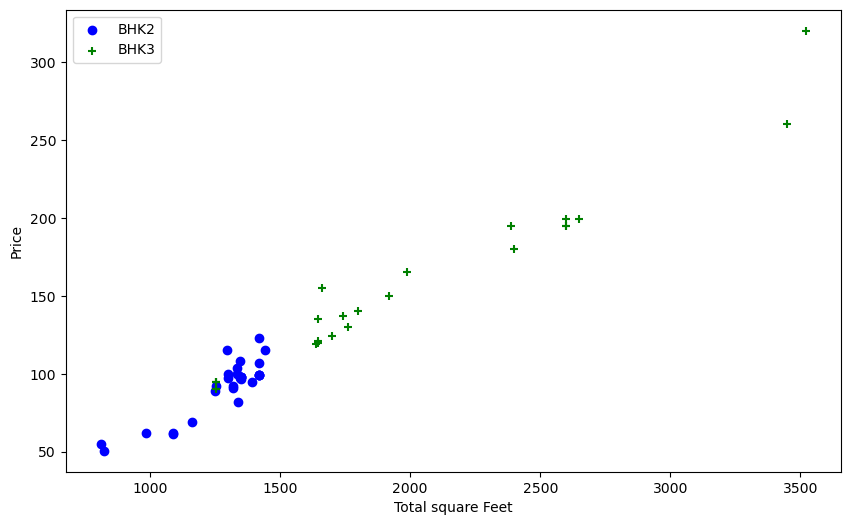

In [42]:
scatter_plot(df6, 'Hebbal')

In [43]:
df6[df6.bath > df6.bhk+2]

,area_type,location,size,society,total_sqft,bath,balcony,price,bhk,price_per_sqft
3780,Super built-up Area,Thanisandra,3 BHK,Soitya,1806.0,6.0,2.0,116.0,3,6423.034330
4821,Super built-up Area,other,6 BHK,Prowshi,11338.0,9.0,1.0,1000.0,6,8819.897689


In [44]:
df7 = df6[df6.bath < df6.bhk+2]

In [45]:
df7

,area_type,location,size,society,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,1st Phase JP Nagar,4 BHK,Prhtsok,2825.0,4.0,3.0,250.0,4,8849.557522
1,Super built-up Area,1st Phase JP Nagar,3 BHK,Prhtsok,1875.0,3.0,1.0,167.0,3,8906.666667
2,Super built-up Area,1st Phase JP Nagar,2 BHK,NCaveun,1394.0,2.0,1.0,100.0,2,7173.601148
3,Super built-up Area,1st Phase JP Nagar,2 BHK,Inntsth,1077.0,2.0,2.0,93.0,2,8635.097493
4,Super built-up Area,1st Phase JP Nagar,3 BHK,Inntsth,1590.0,3.0,3.0,131.0,3,8238.993711
...,...,...,...,...,...,...,...,...,...,...
5729,Super built-up Area,other,2 BHK,MJarlPe,1155.0,2.0,1.0,64.0,2,5541.125541
5730,Super built-up Area,other,3 BHK,Sariana,1508.0,3.0,1.0,77.0,3,5106.100796
5732,Super built-up Area,other,2 BHK,Maa 5a,1095.0,2.0,1.0,57.0,2,5205.479452
5734,Built-up Area,other,2 BHK,Sariana,1256.0,2.0,1.0,65.0,2,5175.159236


In [46]:
df8 = df7.drop(['balcony', 'area_type', 'size', 'price_per_sqft'], axis = 1)

In [47]:
df8

,location,society,total_sqft,bath,price,bhk
0,1st Phase JP Nagar,Prhtsok,2825.0,4.0,250.0,4
1,1st Phase JP Nagar,Prhtsok,1875.0,3.0,167.0,3
2,1st Phase JP Nagar,NCaveun,1394.0,2.0,100.0,2
3,1st Phase JP Nagar,Inntsth,1077.0,2.0,93.0,2
4,1st Phase JP Nagar,Inntsth,1590.0,3.0,131.0,3
...,...,...,...,...,...,...
5729,other,MJarlPe,1155.0,2.0,64.0,2
5730,other,Sariana,1508.0,3.0,77.0,3
5732,other,Maa 5a,1095.0,2.0,57.0,2
5734,other,Sariana,1256.0,2.0,65.0,2


In [48]:
dummies = pd.get_dummies(df8.location)
dummies = dummies.astype(int)
dummies.head(4)

,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,...,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df9 = pd.concat([df8, dummies.drop(['other'], axis = 'columns')], axis = 'columns')

In [50]:
df9.head(4)

,location,society,total_sqft,bath,price,bhk,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Tumkur Road,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,1st Phase JP Nagar,Prhtsok,2825.0,4.0,250.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Phase JP Nagar,Prhtsok,1875.0,3.0,167.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Phase JP Nagar,NCaveun,1394.0,2.0,100.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Phase JP Nagar,Inntsth,1077.0,2.0,93.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df10 = df9.drop('location', axis = 'columns')
df10.head()

,society,total_sqft,bath,price,bhk,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Tumkur Road,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,Prhtsok,2825.0,4.0,250.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Prhtsok,1875.0,3.0,167.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NCaveun,1394.0,2.0,100.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Inntsth,1077.0,2.0,93.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Inntsth,1590.0,3.0,131.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df10.shape

(3937, 159)

In [53]:
X = df10.drop(['society','price'], axis = 1)
y = df10['price']

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [55]:
X_train

,total_sqft,bath,bhk,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,...,Tumkur Road,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
551,1767.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1807,1832.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1417,1435.0,2.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2296,1187.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2544,1349.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4718,1532.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1720,1255.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
645,1075.0,2.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4261,1655.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [56]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9217264601238663

In [57]:
y_test.shape

(788,)

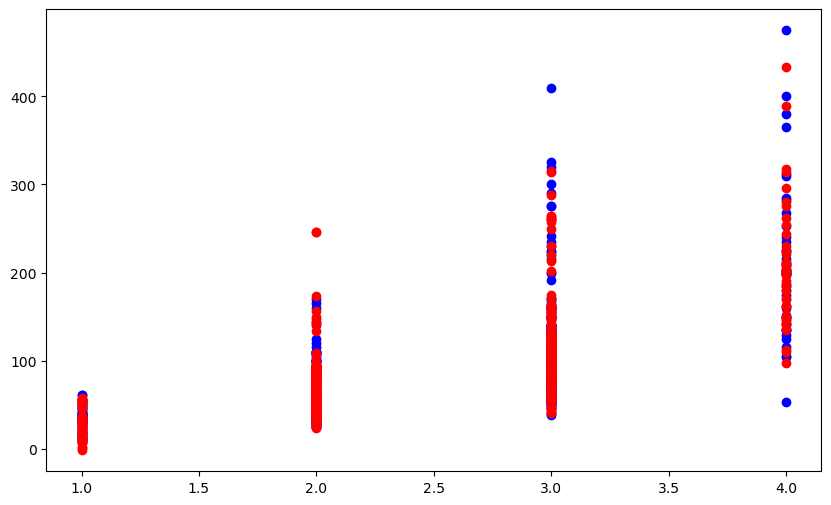

In [58]:
y_predict = lr.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(X_test.to_numpy()[:, 2], y_test, color='blue', label='Actual')
plt.scatter(X_test.to_numpy()[:, 2], y_predict, color='red', label='Predicted')

In [88]:
y_predict.shape

(788,)

In [59]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Phase JP Nagar', '5th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar',
       'AECS Layout', 'Abbigere',
       ...
       'Tumkur Road', 'Uttarahalli', 'Varthur', 'Vidyaranyapura',
       'Vijayanagar', 'Vittasandra', 'Whitefield', 'Yelahanka',
       'Yelahanka New Town', 'Yeshwanthpur'],
      dtype='object', length=157)

In [60]:
np.where(X.columns == 'AECS Layout')[0][0]

8

In [61]:
def predict_price(location, sqft, bhk, bath):
    idx = np.where(X.columns == location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if idx >= 0:
        x[idx] = 1
    x_df = pd.DataFrame([x], columns = X.columns)
    return lr.predict(x_df)[0]

In [62]:
ans = predict_price('1st Phase JP Nagar', 1000, 2 , 2)
print(ans)

93.47445506556411


In [63]:
ans = predict_price('8th Phase JP Nagar', 1000, 2 , 2)
print(ans)

49.82402193648242


In [64]:
predict_price('8th Phase JP Nagar', 1000, 2 , 3)

54.34257881707124

In [65]:
predict_price('Indira Nagar', 1000, 3, 3)

123.42567080279852

In [66]:
import pickle

with open('bangalore_home_price_model.pickle', 'wb') as f:
    pickle.dump(lr, f)

In [67]:
import json
columns = {
    'data columns' : [x for x in X.columns]
}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))

In [68]:
type(X.columns)

pandas.core.indexes.base.Index

In [69]:
y.head(3)

0    250.0
1    167.0
2    100.0
Name: price, dtype: float64

In [70]:
X.head(3)

,total_sqft,bath,bhk,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,...,Tumkur Road,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,2825.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1875.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1394.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
type(X)

pandas.core.frame.DataFrame

In [72]:
predict_price('8th Phase JP Nagar', 1000, 2 , 2)

49.82402193648242

In [73]:
predict_price('1st Phase JP Nagar', 1000, 2 , 2)

93.47445506556411

In [74]:
predict_price('1st Phase JP Nagar', 1000, 2 , 2)

93.47445506556411

In [75]:
predict_price('1st Phase JP Nagar', 1000, 3 , 2)

89.58299769018925

In [76]:
predict_price('1st Phase JP Nagar', 1000, 2 , 3)

97.99301194615293

In [77]:
X_train

,total_sqft,bath,bhk,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,...,Tumkur Road,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
551,1767.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1807,1832.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1417,1435.0,2.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2296,1187.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2544,1349.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4718,1532.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1720,1255.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
645,1075.0,2.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4261,1655.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [102]:
from interpret.blackbox import LimeTabular
from interpret import show
from sklearn.metrics import f1_score, accuracy_score

In [118]:
from interpret.blackbox import LimeTabular

# Initialize the LimeTabular explainer with the model and data
lime = LimeTabular(model=lr, data=X_train, random_state=1)

# Generate local explanations for a subset of instances
lime_local = lime.explain_local(X_test[:20], y_test[:20], name='LIME')

# Visualize the explanations
show(lime_local)

<!-- http://127.0.0.1:7001/6369317168/ -->